In [2]:
from dstaster import *

In [3]:
# Load data
collection = pd.read_csv("../tate/paintings.csv", index_col=0)
collection

,artist,title,year,groundtruth,height,width
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394
...,...,...,...,...,...,...
N05609,Maurice Sterne,Mexican Church Interior,1934,O,1283,1022
T14823,Unknown artist,Leon Trotsky,1980,P,510,480
AL00397,Louise Bourgeois,Untitled,1946,O,660,1116
T14824,Unknown artist,Leon Trotsky,1980,P,638,511


(Add new column to DataFrame)

In [36]:
collection['ratio'] =  collection['height'] / collection['width']
collection

,artist,title,year,groundtruth,height,width,ratio,ratio_model
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920,0.800521,L
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500,1.216000,O
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600,1.211667,O
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219,0.749795,L
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394,1.370558,P
...,...,...,...,...,...,...,...,...
N05609,Maurice Sterne,Mexican Church Interior,1934,O,1283,1022,1.255382,P
T14823,Unknown artist,Leon Trotsky,1980,P,510,480,1.062500,O
AL00397,Louise Bourgeois,Untitled,1946,O,660,1116,0.591398,L
T14824,Unknown artist,Leon Trotsky,1980,P,638,511,1.248532,O


In [31]:
iland = collection['ratio'] >= 1.2
iport = collection['ratio'] <= .8
irest = (~iland) & (~iport)

collection['ratio_model'] = 'O'
collection.loc[iland,'ratio_model'] = 'L'
collection.loc[iport,'ratio_model'] = 'P'

collection

,artist,title,year,groundtruth,height,width,ratio,ratio_model
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920,0.800521,O
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500,1.216000,L
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600,1.211667,L
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219,0.749795,P
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394,1.370558,L
...,...,...,...,...,...,...,...,...
N05609,Maurice Sterne,Mexican Church Interior,1934,O,1283,1022,1.255382,L
T14823,Unknown artist,Leon Trotsky,1980,P,510,480,1.062500,O
AL00397,Louise Bourgeois,Untitled,1946,O,660,1116,0.591398,P
T14824,Unknown artist,Leon Trotsky,1980,P,638,511,1.248532,L


In [38]:
from ipywidgets import *
import ipywidgets as widgets

try:
    # Tests a) that the variable is defined and b) that it's not None
    if collection is None: 
        raise NameError
except NameError:
    error("<code>collection</code> undefined.",
          "Did you run the code cells above?")

if 'ratio' not in collection:
    error("'ratio' column not found", 
          "Did you run the code cells above?")
    

def plot_thresh(lower, upper):
    iport = collection['ratio'] >= upper
    iland = collection['ratio'] <= lower
    irest = (~iland) & (~iport)

    collection['ratio_model'] = 'O'
    collection.loc[iland,'ratio_model'] = 'L'
    collection.loc[iport,'ratio_model'] = 'P'

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), dpi=120)

    ax1.set_xlabel('Width (mm)')
    ax1.set_ylabel('Height (mm)')

    ax1.set_xlim(200, 5000)
    ax1.set_ylim(200, 5000)

    ax1.set_xscale('log')
    ax1.set_yscale('log')

    for ix, name, col in zip([irest,iland,iport],['Other','Landscape','Portrait'],['lightgray','green','blue']):
        ax1.scatter(collection[ix]['width'], collection[ix]['height'], 
                   label=name, marker='+', c=colors[col], alpha=.75)

    ax1.plot([200,5000], [200*upper,5000*upper], color=colors['pink'], ls='--', lw=2 )
    ax1.plot([200,5000], [200*lower,5000*lower], color=colors['pink'], ls='--', lw=2 )

    # ax1.get_xaxis().get_major_formatter().labelOnlyBase = False
    ax1.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax1.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax1.set_xticks([250, 500,1000,2000,4000])
    ax1.set_yticks([250, 500,1000,2000,4000])

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Reverse legend
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[::-1], labels[::-1], title='Model output')


    # Plot confusion matrix
    truth = collection['groundtruth']
    pred = collection['ratio_model']

    plot_confusion_matrix(truth, pred, 'LPO', ax2)

    return fig, (ax1, ax2)

layout = {
    'width': '70%',
}

upper_slider = widgets.FloatSlider(
    value=1.2,
    min=1.1,
    max=1.3,
    step=0.025,
    description='Upper threshold:',
    continuous_update=False,
    readout_format='.3f',
    layout=layout
)

lower_slider = widgets.FloatSlider(
    value=.8,
    min=.7,
    max=.9,
    step=0.025,
    description='Lower threshold:',
    continuous_update=False,
    readout_format='.3f',
    layout=layout
)

interact(plot_thresh, lower=lower_slider, upper=upper_slider)


pass


interactive(children=(FloatSlider(value=0.8, continuous_update=False, description='Lower threshold:', layout=L…

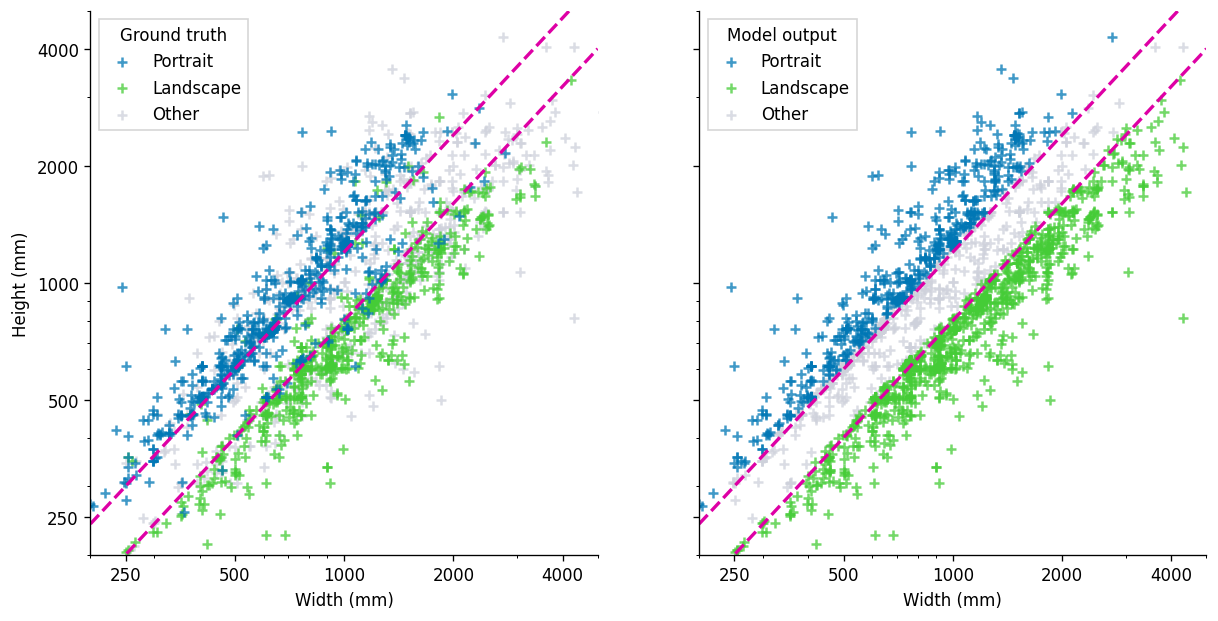

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), dpi=120, sharey=True)

ax1, ax2 = axes

ax1.set_ylabel('Height (mm)')
for ax in axes:
    ax.set_xlabel('Width (mm)')

    ax.set_xlim(200, 5000)
    ax.set_ylim(200, 5000)

    ax.set_xscale('log')
    ax.set_yscale('log')

tland = collection['groundtruth'] == 'L'
tport = collection['groundtruth'] == 'P'
trest = (~tland) & (~tport)

for ix, name, col in zip([trest,tland,tport],['Other','Landscape','Portrait'],['lightgray','green','blue']):
    ax1.scatter(collection[ix]['width'], collection[ix]['height'], 
               label=name, marker='+', c=colors[col], alpha=.75)

for ix, name, col in zip([irest,iland,iport],['Other','Landscape','Portrait'],['lightgray','green','blue']):
    ax2.scatter(collection[ix]['width'], collection[ix]['height'], 
               label=name, marker='+', c=colors[col], alpha=.75)    
    
for ax, title in zip(axes, ['Ground truth', 'Model output']):
    ax.plot([200,5000], [200*1.2,5000*1.2], color=colors['pink'], ls='--', lw=2 )
    ax.plot([200,5000], [200*.8,5000*.8], color=colors['pink'], ls='--', lw=2 )

    ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.set_xticks([250, 500,1000,2000,4000])
    ax.set_yticks([250, 500,1000,2000,4000])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Reverse legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title=title)


pass

/usr/local/lib64/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


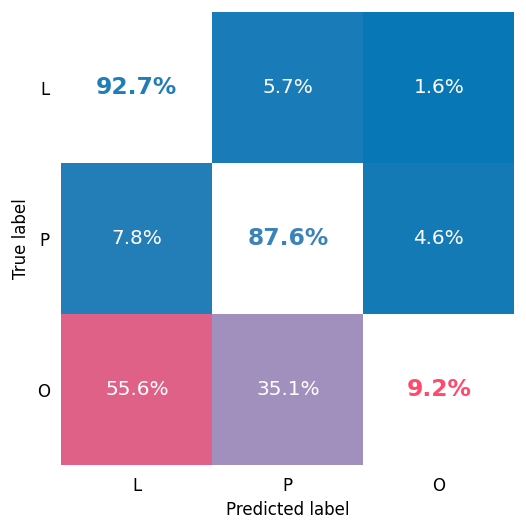

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

truth = collection['groundtruth']
pred = collection['ratio_model']

fig, ax = plt.subplots(figsize=(5.5,5), dpi=120)
plot_confusion_matrix(truth, pred, 'LPO', ax)

In [8]:
collection[['ratio_model']].to_csv('tate/ratio_model.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'tate/ratio_model.csv'